In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
train = pd.read_csv("./datasets_shop/train.csv")
test = pd.read_csv("./datasets_shop/test.csv")

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


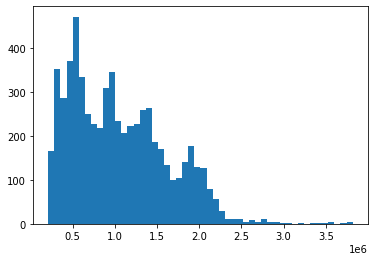

In [64]:
plt.hist(train.Weekly_Sales, bins=50)
plt.show()

In [65]:
train = train.fillna(0)
test = test.fillna(0)

In [66]:
from datetime import datetime

In [67]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [70]:
train['Date'] = pd.to_datetime(train['Date'], dayfirst=True)
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,2012-09-14,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [71]:
test['Date'] = pd.to_datetime(test['Date'], dayfirst=True)
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,2012-10-05,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,False
1,2,1,2012-10-12,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,False
2,3,1,2012-10-19,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,False
3,4,1,2012-10-26,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,2012-10-05,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,False
176,177,45,2012-10-05,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,False
177,178,45,2012-10-12,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,False
178,179,45,2012-10-19,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,False


In [74]:
train['month'] = train['Date'].dt.month
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,month
0,1,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2
1,2,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2
2,3,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2
3,4,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2
4,5,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9
6252,6253,45,2012-09-14,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9


In [76]:
def season(x):
    if 3 <= x <= 5:
        return 0
    elif 6 <= x <= 8:
        return 1
    elif 9 <= x <= 11:
        return 2
    else:
        return 3

In [77]:
train.month = train.month.apply(season)
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,month
0,1,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,3
1,2,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,3
2,3,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,3
3,4,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,3
4,5,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,1
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,2
6252,6253,45,2012-09-14,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,2
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,2


In [78]:
test['Date'] = pd.to_datetime(test['Date'], dayfirst=True)
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,2012-10-05,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,False
1,2,1,2012-10-12,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,False
2,3,1,2012-10-19,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,False
3,4,1,2012-10-26,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,2012-10-05,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,False
176,177,45,2012-10-05,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,False
177,178,45,2012-10-12,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,False
178,179,45,2012-10-19,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,False


In [79]:
test['month'] = test['Date'].dt.month
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,month
0,1,1,2012-10-05,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,False,10
1,2,1,2012-10-12,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,False,10
2,3,1,2012-10-19,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,False,10
3,4,1,2012-10-26,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False,10
4,5,2,2012-10-05,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,False,10
176,177,45,2012-10-05,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,False,10
177,178,45,2012-10-12,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,False,10
178,179,45,2012-10-19,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,False,10


In [81]:
test.month = test.month.apply(season)
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,month
0,1,1,2012-10-05,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,False,2
1,2,1,2012-10-12,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,False,2
2,3,1,2012-10-19,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,False,2
3,4,1,2012-10-26,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False,2
4,5,2,2012-10-05,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,False,2
176,177,45,2012-10-05,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,False,2
177,178,45,2012-10-12,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,False,2
178,179,45,2012-10-19,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,False,2


In [96]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [99]:
ss.fit(train[["Promotion1","Promotion2","Promotion3","Promotion4","Promotion5"]])
train[["Promotion1","Promotion2","Promotion3","Promotion4","Promotion5"]] = ss.transform(train[["Promotion1","Promotion2","Promotion3","Promotion4","Promotion5"]])

In [100]:
ss.fit(test[["Promotion1","Promotion2","Promotion3","Promotion4","Promotion5"]])
test[["Promotion1","Promotion2","Promotion3","Promotion4","Promotion5"]] = ss.transform(test[["Promotion1","Promotion2","Promotion3","Promotion4","Promotion5"]])

In [101]:
X_train = train.drop(['id', 'Date', 'Unemployment','Weekly_Sales'], axis=1)
X_train

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,IsHoliday,month
0,1,42.31,2.572,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,False,3
1,1,38.51,2.548,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,True,3
2,1,39.93,2.514,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,False,3
3,1,46.63,2.561,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,False,3
4,1,46.50,2.625,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,False,0
...,...,...,...,...,...,...,...,...,...,...
6250,45,75.09,3.867,3.580831,-0.168998,-0.065037,1.574261,0.598779,False,1
6251,45,75.70,3.911,1.453422,-0.167623,-0.072573,0.222921,0.128229,True,2
6252,45,67.87,3.948,1.518086,-0.170211,-0.081610,0.635401,0.909037,False,2
6253,45,65.32,4.038,1.019698,-0.151556,-0.070589,0.360229,1.735591,False,2


In [102]:
y_train = train["Weekly_Sales"]

In [103]:
X_test = test.drop(['id', 'Date', 'Unemployment'], axis=1)

In [105]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [106]:
y_pred = model.predict(X_test)

[1608619.332  1533622.3182 1523616.1584 1536467.2557 1831855.2727
 1861830.5187 1786956.9242 1788520.9928  411489.9596  400973.526 ]


In [109]:
sample_submission = pd.read_csv('./datasets_shop/sample_submission.csv')

sample_submission["Weekly_Sales"] = y_pred

sample_submission.head()

,id,Weekly_Sales
0,1,1657699.625
1,2,1688589.250
2,3,1518183.875
3,4,1478447.125
4,5,1849305.250


In [111]:
sample_submission.to_csv('./datasets_shop/submisson.csv', index=False)

In [113]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV

In [ ]:
gs()